In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [ ]:
prasad = pd.read_csv("/content/diabetes.csv")

In [ ]:
prasad.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
prasad.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
prasad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
prasad.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
len(prasad)

768

In [ ]:
# Replace zeroes
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

In [ ]:
for column in zero_not_accepted:
    prasad[column] = prasad[column].replace(0, np.NaN)
    mean = int(prasad[column].mean(skipna=True))
    prasad[column] = prasad[column].replace(np.NaN, mean)

In [ ]:
prasad.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
print(prasad['Glucose'])

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64


In [ ]:
if np.NaN in prasad.values:
    print("There is still a missing value")

In [ ]:
# Splitting Data Set 
X = prasad.iloc[:, 0:8]
y = prasad.iloc[:, 8]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

614
614
154
154


In [ ]:
# Feature Scaling 
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
# Finding value of k 
import math 
math.sqrt(len(y_test))

12.409673645990857

In [ ]:
# Defining the model 
classifier = KNeighborsClassifier(n_neighbors=11, p=2,metric='euclidean')

In [ ]:
# Fitting the model 
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [ ]:
# Predicting the test set 
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

F1 Score: In the F1 score, we compute the average of precision and recall. They are both rates, which makes it a logical choice to use the harmonic mean.
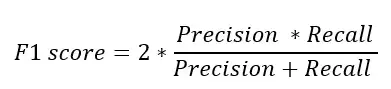

In [ ]:
# Evaluate Model 
cm = confusion_matrix(y_test, y_pred)
print (cm)
print(f1_score(y_test, y_pred))

[[94 13]
 [15 32]]
0.6956521739130436


In [ ]:
print(accuracy_score(y_test, y_pred))

0.8181818181818182


In [ ]:
from sklearn import metrics

In [ ]:
print( metrics.classification_report( y_test, y_pred ) )

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       107
           1       0.71      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.82      0.82      0.82       154



In [ ]:
# Optimal Parameters
from sklearn.model_selection import GridSearchCV

In [ ]:
## Creating a dictionary with hyperparameters and possible values for searching
tuned_parameters = [{'n_neighbors': range(5,10), 
                     'metric': ['canberra', 'euclidean', 'minkowski']}]

In [ ]:
## Configuring grid search
clf = GridSearchCV(KNeighborsClassifier(),
                 tuned_parameters,
                 cv=10,
                 scoring='roc_auc')
## fit the search with training set
clf.fit(X_train, y_train )

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['canberra', 'euclidean', 'minkowski'],
                          'n_neighbors': range(5, 10)}],
             scoring='roc_auc')

In [ ]:
clf.best_score_

0.7975885527515962

In [ ]:
clf.best_params_

{'metric': 'euclidean', 'n_neighbors': 8}